In [69]:
from IPython.display import Image
from PIL import Image as Image_PIL
from transformers import pipeline

fileName = './Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png'
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/Applications/anaconda3/envs/VisionTransport/lib/python3.10/site-packages/transformers/models/segformer/image_processing_segformer.py:102: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [70]:
results = semantic_segmentation(fileName)

In [71]:
results

[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=2048x1024>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=2048x1024>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=2048x1024>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=2048x1024>},
 {'score': None,
  'label': 'traffic light',
  'mask': <PIL.Image.Image image mode=L size=2048x1024>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=2048x1024>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=2048x1024>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=2048x1024>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=2048x1024>},
 {'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=2048x1024>},
 {'score': None,
  'label

In [72]:
colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (255, 255, 0),
    (0, 255, 255),
    (255, 0, 255),
    (255, 255, 255),
    (255, 165, 0),
    (128, 0, 128),
    (255, 192, 203),
    (64, 224, 208),
    (128, 128, 128),
    (255, 255, 153)
]

In [73]:
def color_mask(fileName, image_segmentation):
    #img = Image(filename=fileName)
    img = Image_PIL.new(mode = "RGBA", size = (2048, 1024),
                           color = (255, 255, 255))
    i= 0
    for mask in image_segmentation:
        im = mask['mask']
        im = im.convert("RGBA")

        d = im.getdata()
        newData = []
        for item in d:
            if item[0] == 255 and item[1] == 255 and item[2] == 255:
                newData.append(colors[i])
            elif item[0] == 0 and item[1] == 0 and item[2] == 0:
                newData.append((0, 0, 0, 0))
            else:
                newData.append(item)

        im.putdata(newData)
        im.putalpha(50)
        img.paste(im, (0, 0), im)
        i+=1
    return img

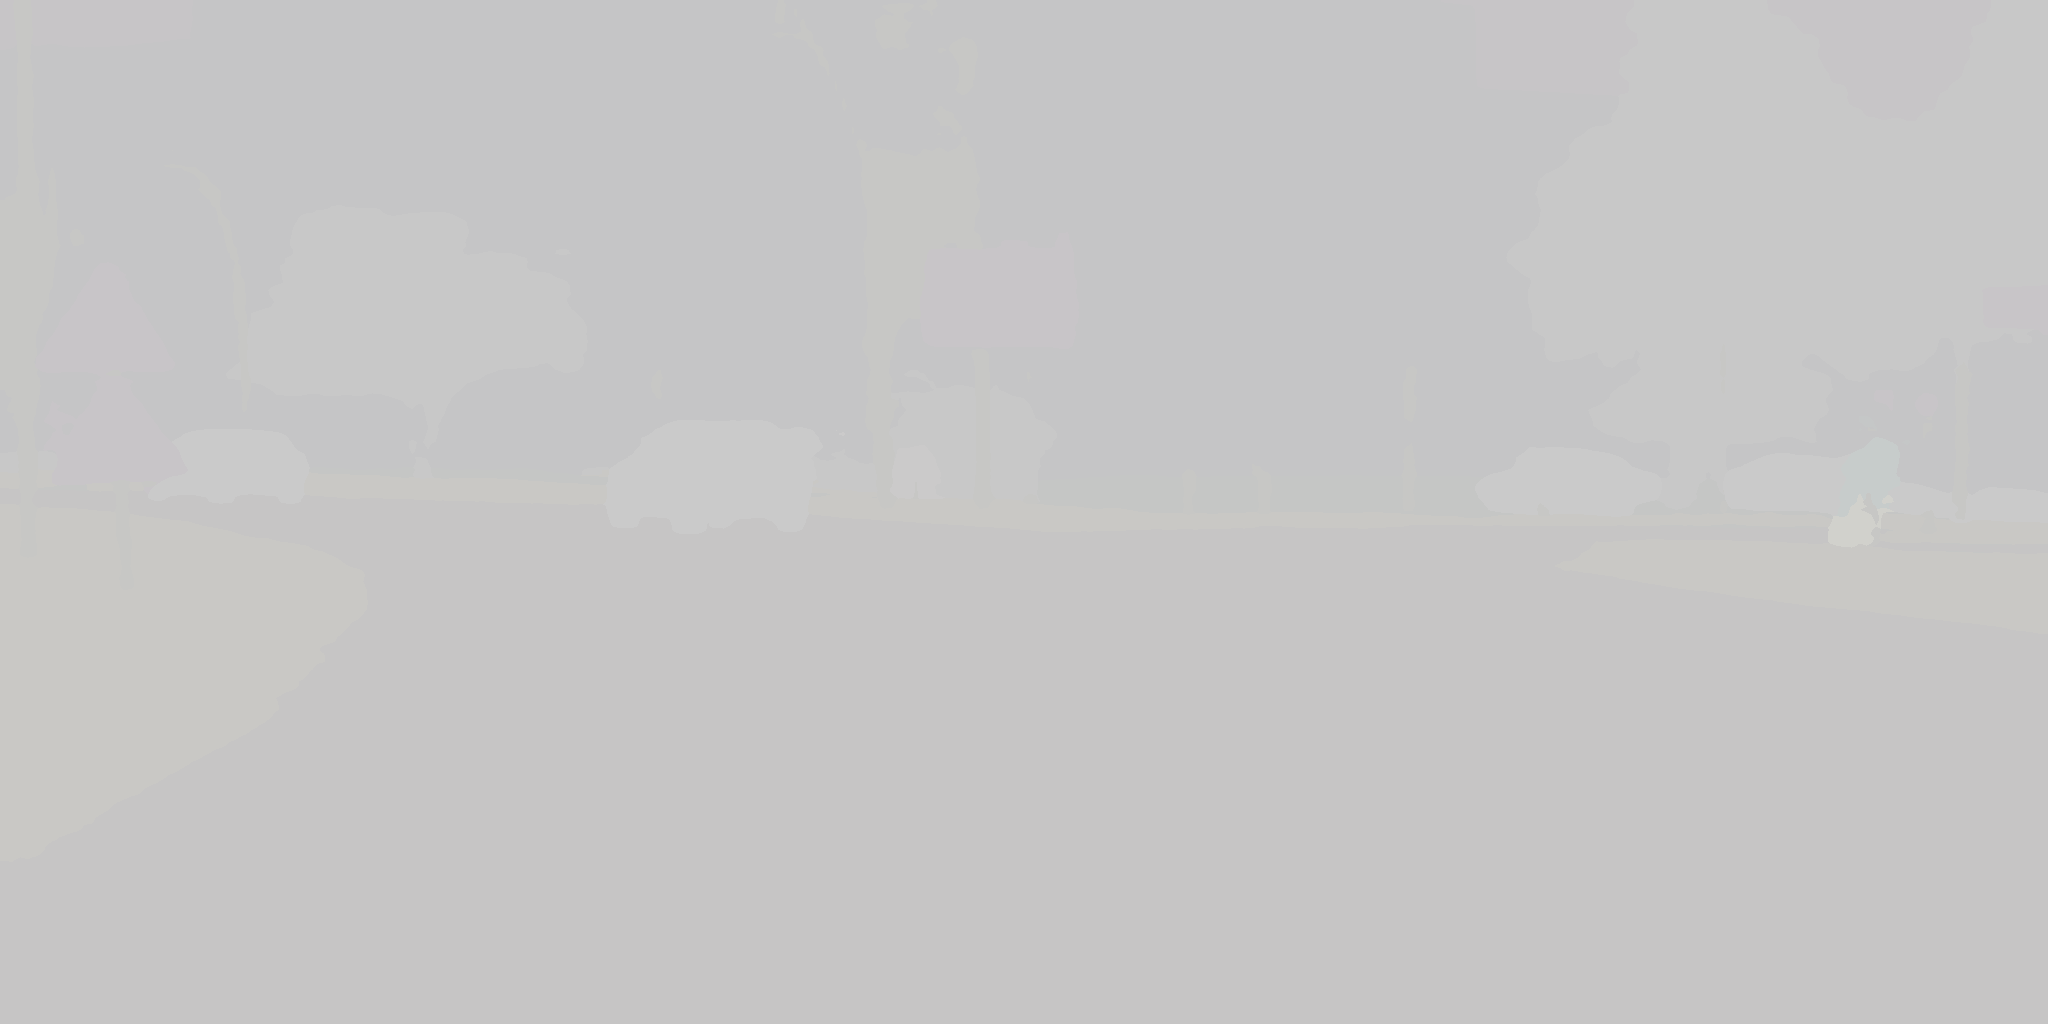

In [74]:
color_mask(fileName, results)